# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})


fn = "Profissão Cientista de Dados M6 - SINASC_RO_2019.csv"
df = pd.read_csv(fn, encoding="utf-8", low_memory=False)


print(df.shape)
print(df.columns.tolist())
df.head()

(27028, 69)
['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO', 'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea']


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
apgar_col = "APGAR5"         
df[apgar_col] = pd.to_numeric(df[apgar_col], errors='coerce')

bins = [-1, 3, 6, 10]
labels = ['grave', 'moderada', 'normal']
df['APGAR5_cat'] = pd.cut(df[apgar_col], bins=bins, labels=labels)

# Verificação
print(df['APGAR5_cat'].value_counts(dropna=False))
df[['APGAR5', 'APGAR5_cat']].head(10)

APGAR5_cat
normal      26704
moderada      147
NaN           103
grave          74
Name: count, dtype: int64


,APGAR5,APGAR5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
5,10.0,normal
6,10.0,normal
7,10.0,normal
8,9.0,normal
9,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Linhas totais df: 27028
Linhas após dropna(APGAR5_cat, SEXO_std, GESTACAO): 26921
Valores SEXO padronizados: ['F', 'M']
Valores GESTACAO presentes: ['nan']
Nenhuma faixa de GESTACAO válida encontrada; mostrando gráfico agregado por SEXO.


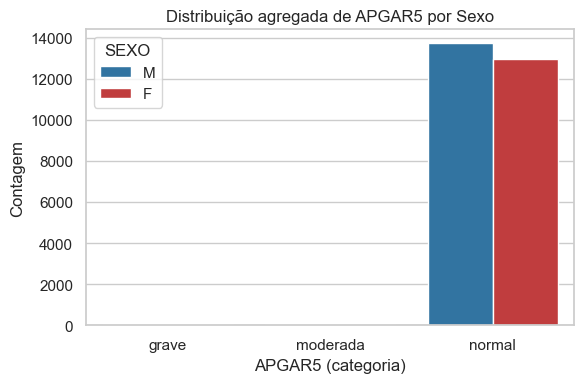

In [18]:
apgar_num_col = "APGAR5"
apgar_cat_col = "APGAR5_cat"
gest_col = "GESTACAO"
sexo_col = "SEXO"

# 1) garantir APGAR5 numérico e criar categoria
df[apgar_num_col] = pd.to_numeric(df[apgar_num_col], errors='coerce')
if apgar_cat_col not in df.columns:
    bins = [-1, 3, 6, 10]
    labels = ["grave", "moderada", "normal"]
    df[apgar_cat_col] = pd.cut(df[apgar_num_col], bins=bins, labels=labels)

# 2) padronizar SEXO para 'M' / 'F' e tratar valores faltantes
def padroniza_sexo(v):
    if pd.isna(v): return pd.NA
    s = str(v).strip().lower()
    if s in ("m","masculino","male"): return "M"
    if s in ("f","feminino","female"): return "F"
    return pd.NA

df[sexo_col + "_std"] = df[sexo_col].apply(padroniza_sexo)

# 3) normalizar GESTACAO (trim) e construir df_plot sem dropar por allowed ainda
df[gest_col] = df[gest_col].astype(str).str.strip()
df_plot = df[[apgar_cat_col, sexo_col + "_std", gest_col]].rename(columns={sexo_col + "_std": sexo_col}).dropna()

# 4) diagnóstico rápido
print("Linhas totais df:", len(df))
print("Linhas após dropna(APGAR5_cat, SEXO_std, GESTACAO):", df_plot.shape[0])
print("Valores SEXO padronizados:", sorted(df_plot[sexo_col].unique()))
print("Valores GESTACAO presentes:", sorted(df_plot[gest_col].dropna().unique())[:30])

# 5) escolher faixas a usar como facetas (excluir rótulos irrelevantes)
exclude = {"Ignorado","Não Aplicável","nan","NAN","NaN","None","NoneType",""}
present_gest = sorted([g for g in df_plot[gest_col].unique() if str(g) not in exclude])

# 6) se não houver facetas válidas, mostrar gráfico agregado por SEXO
palette_map = {"M": "#1f77b4", "F": "#d62728"}
if df_plot.shape[0] == 0:
    print("df_plot vazio: não há dados suficientes após padronização. Mostrando amostra:")
    display(df[[apgar_num_col, apgar_cat_col, sexo_col, gest_col]].head(30))
elif len(present_gest) == 0:
    print("Nenhuma faixa de GESTACAO válida encontrada; mostrando gráfico agregado por SEXO.")
    agg = df_plot[[apgar_cat_col, sexo_col]].dropna()
    plt.figure(figsize=(6,4))
    sns.countplot(data=agg, x=apgar_cat_col, hue=sexo_col, order=["grave","moderada","normal"], palette=palette_map)
    plt.title("Distribuição agregada de APGAR5 por Sexo")
    plt.xlabel("APGAR5 (categoria)")
    plt.ylabel("Contagem")
    plt.tight_layout()
    plt.show()
else:
    
    df_plot = df_plot[df_plot[gest_col].isin(present_gest)]
    col_wrap = 3 if len(present_gest) > 3 else max(1, len(present_gest))
    g = sns.catplot(
        data=df_plot,
        x=apgar_cat_col,
        hue=sexo_col,
        col=gest_col,
        col_order=present_gest,
        col_wrap=col_wrap,
        kind='count',
        order=["grave","moderada","normal"],
        palette=palette_map,
        height=4, aspect=1, sharey=False, margin_titles=True
    )
    g.fig.suptitle("Distribuição de APGAR5 (categoria) por Sexo em cada faixa de GESTACAO", y=1.02)
    g.set_axis_labels("APGAR5 (categoria)", "Contagem")
    plt.tight_layout()
    plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [29]:
# garantir colunas de trabalho
if "APGARS_cat" not in df.columns:
    df["APGARS_cat"] = pd.cut(df["APGAR5"], bins=[-1,3,6,10], labels=["grave","moderada","normal"])

# usar coluna GESTACAO_use criada no bloco 3 (fallback "Desconhecido")
if "GESTACAO_use" not in df.columns:
    df["GESTACAO_use"] = df["GESTACAO"].astype(str).replace({"nan":"Desconhecido","<NA>":"Desconhecido","None":"Desconhecido"})

df_ct = df[["GESTACAO_use","APGARS_cat"]].dropna()
ct = pd.crosstab(df_ct["GESTACAO_use"], df_ct["APGARS_cat"], dropna=False)
print("Tabela cruzada (counts):")
display(ct)

Tabela cruzada (counts):


APGARS_cat,grave,moderada,normal
GESTACAO_use,,,
Desconhecido,74,147,26704


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [30]:
ct_row_pct = ct.div(ct.sum(axis=1).replace(0,np.nan), axis=0).fillna(0) * 100
print("Percentuais por linha (%):")
display(ct_row_pct.round(2))

Percentuais por linha (%):


APGARS_cat,grave,moderada,normal
GESTACAO_use,,,
Desconhecido,0.27,0.55,99.18


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

C:\Users\wilma\AppData\Local\Temp\ipykernel_3608\3957201856.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("tab10") if n_cols <= 10 else mpl.cm.get_cmap("tab20")


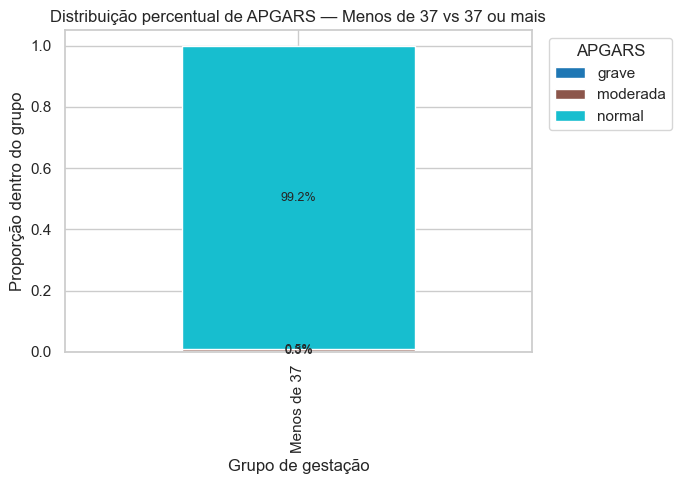

In [48]:
ctp = ct_pct.copy()
if (ctp.max().max() > 1.1):  # já está em %
    ctp = ctp / 100.0

# selecionar apenas os dois grupos esperados (Menos de 37, 37 ou mais)
wanted = ["Menos de 37", "37 ou mais"]
present = [g for g in wanted if g in ctp.index]
if len(present) < 1:
    raise RuntimeError("ct_pct não contém as categorias esperadas. Verifique ct_pct antes.")
df_plot = ctp.loc[present]

# garantir ordem de colunas: grave, moderada, normal
order = ["grave","moderada","normal"]
cols = [c for c in order if c in df_plot.columns] + [c for c in df_plot.columns if c not in order]
df_plot = df_plot[cols]

# cores e plot
n_cols = df_plot.shape[1]
cmap = mpl.cm.get_cmap("tab10") if n_cols <= 10 else mpl.cm.get_cmap("tab20")
colors = [cmap(i / max(1, n_cols-1)) for i in range(n_cols)]

ax = df_plot.plot(kind="bar", stacked=True, color=colors, figsize=(7,5))
ax.set_ylabel("Proporção dentro do grupo")
ax.set_xlabel("Grupo de gestação")
ax.set_title("Distribuição percentual de APGARS — Menos de 37 vs 37 ou mais")
ax.legend(title="APGARS", bbox_to_anchor=(1.02,1), loc="upper left")

# rótulos percentuais (centro das fatias)
for container in ax.containers:
    labels = []
    for patch in container:
        h = patch.get_height()
        labels.append(f"{h*100:.1f}%" if h>0 else "")
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\wilma\AppData\Local\Temp\ipykernel_3608\2702632678.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="APGARS_cat", y=peso_col, order=["grave","moderada","normal"], palette="pastel")


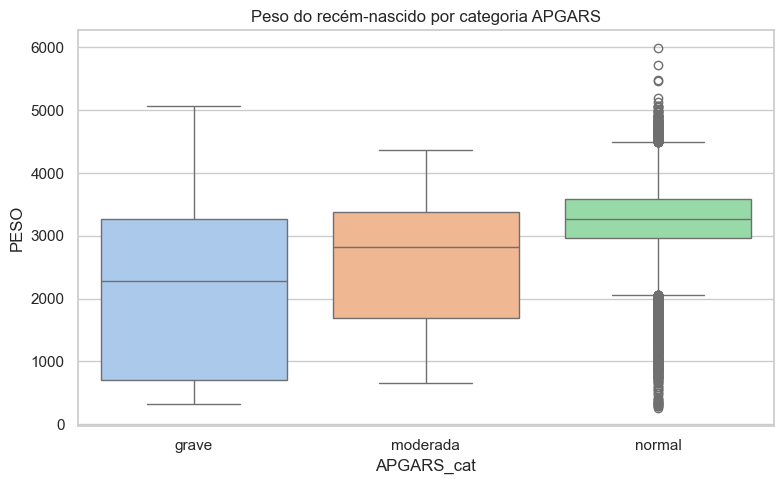

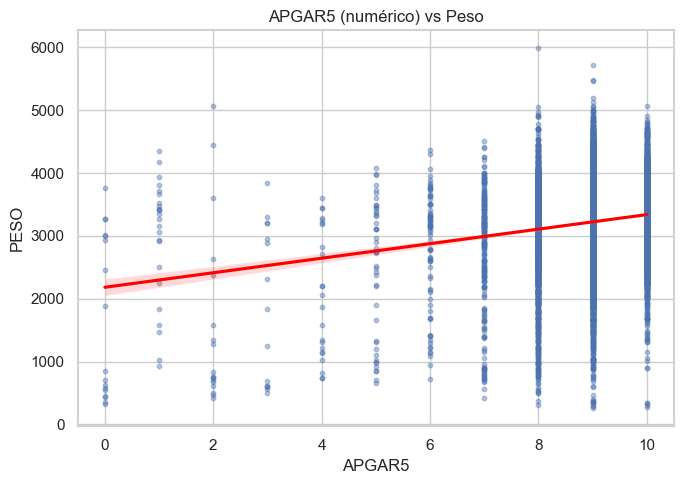

Correlação Pearson: 0.16821001802434465


In [32]:
peso_col = next((c for c in df.columns if "PESO" in c.upper()), None)
if peso_col is None:
    print("Coluna de peso não encontrada automaticamente. Substitua peso_col pelo nome correto.")
else:
    df[peso_col] = pd.to_numeric(df[peso_col], errors="coerce")
    df_box = df.dropna(subset=["APGARS_cat", peso_col])
    if df_box.shape[0] == 0:
        print("Sem dados suficientes de peso x APGARS.")
    else:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=df_box, x="APGARS_cat", y=peso_col, order=["grave","moderada","normal"], palette="pastel")
        plt.title("Peso do recém-nascido por categoria APGARS")
        plt.tight_layout()
        plt.show()

       
        if df["APGAR5"].notna().sum() > 10:
            df_reg = df.dropna(subset=["APGAR5", peso_col])
            plt.figure(figsize=(7,5))
            sns.regplot(data=df_reg, x="APGAR5", y=peso_col, scatter_kws={'s':10,'alpha':0.4}, line_kws={'color':'red'})
            plt.title("APGAR5 (numérico) vs Peso")
            plt.tight_layout()
            plt.show()
            print("Correlação Pearson:", df_reg["APGAR5"].corr(df_reg[peso_col]))